# Capstone Project - Forex Prediction for EURUSD

# Description
For this capstone project, we intend to use several methods to predict the market

1) Economic Indicators

2) Sentiment Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Using Economic Indicators

For this method, we have self-compliled a dataset with 10 years of Economic Data and the respective result impact

    ec1 = Fed Interest Rates
    
    ec2 = NonFarm Payroll
    
    ec3 = CPI (Inflation)
    
    ec4 = Retail Sales
    
    ec5 = GDP

The respective result impact, refers to the closing Up/Down for the particular Date.

In [2]:
# IMPORT
file = './ec.csv'
df = pd.read_csv(file)
df

,Date,EconomicIndicator,ResultDifference,Impact,PriceMove
0,16/3/2022,ec1,-0.0025,NaN,NaN
1,26/1/2022,ec1,0.0000,DOWN,-58.3
2,15/12/2021,ec1,0.0000,UP,38.8
3,3/11/2021,ec1,0.0000,UP,34.0
4,22/9/2021,ec1,0.0000,DOWN,-37.3
...,...,...,...,...,...
625,26/5/2011,ec5,0.0000,NaN,NaN
626,28/4/2011,ec5,-0.0130,NaN,NaN
627,25/3/2011,ec5,0.0030,NaN,NaN
628,25/2/2011,ec5,-0.0040,NaN,NaN


In [3]:
# DATA CLEANING
df.dropna()

,Date,EconomicIndicator,ResultDifference,Impact,PriceMove
1,26/1/2022,ec1,0.000,DOWN,-58.3
2,15/12/2021,ec1,0.000,UP,38.8
3,3/11/2021,ec1,0.000,UP,34.0
4,22/9/2021,ec1,0.000,DOWN,-37.3
5,28/7/2021,ec1,0.000,UP,25.7
...,...,...,...,...,...
611,27/7/2012,ec5,-0.005,UP,35.7
612,28/6/2012,ec5,0.000,DOWN,-24.7
613,31/5/2012,ec5,-0.003,NEUTRAL,-1.9
614,27/4/2012,ec5,-0.008,UP,31.0


<AxesSubplot:xlabel='EconomicIndicator', ylabel='count'>

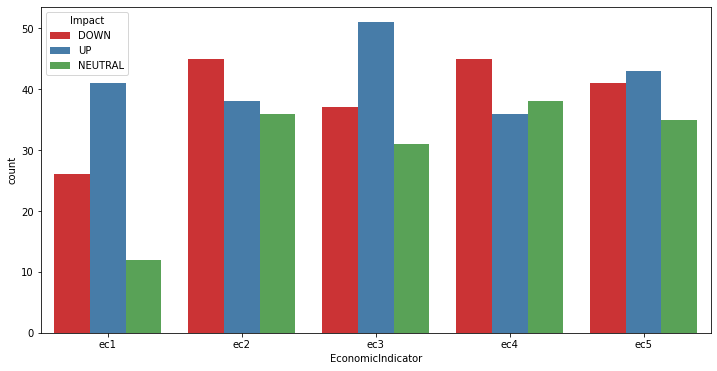

In [4]:
# EDA
# To display for each EC, how many are UP/Down/Neutral
sns.set
plt.figure(figsize=(12,6))
sns.countplot(x='EconomicIndicator', hue='Impact', data=df, palette="Set1")

In [6]:
df_ec1 = df[(df.EconomicIndicator == 'ec1')]
df_ec2 = df[(df.EconomicIndicator == 'ec2')]
df_ec3 = df[(df.EconomicIndicator == 'ec3')]
df_ec4 = df[(df.EconomicIndicator == 'ec4')]
df_ec5 = df[(df.EconomicIndicator == 'ec5')]

Text(0.5, 1.0, 'Fed Interest Rate Decision')

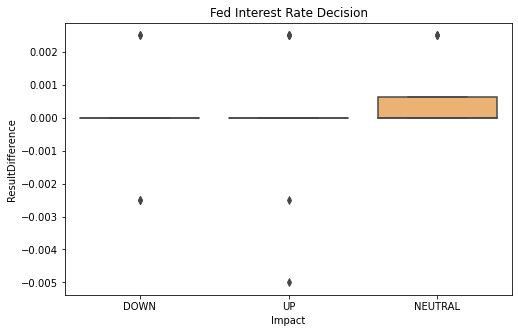

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Impact',y='ResultDifference',data=df_ec1, palette='rainbow')
plt.title("Fed Interest Rate Decision")

Text(0.5, 1.0, 'NonFarm Payroll')

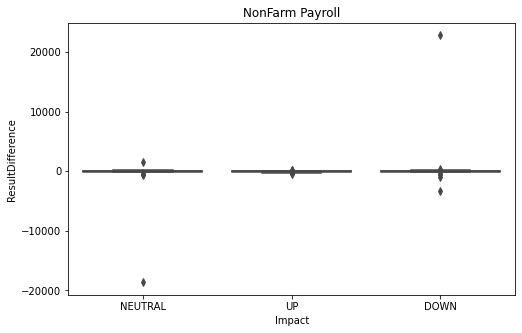

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Impact',y='ResultDifference',data=df_ec2, palette='rainbow')
plt.title("NonFarm Payroll")

Text(0.5, 1.0, 'CPI (Inflation)')

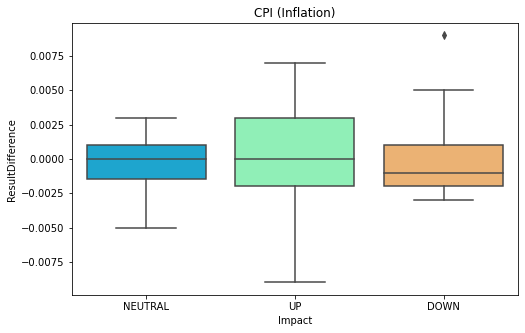

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Impact',y='ResultDifference',data=df_ec3, palette='rainbow')
plt.title("CPI (Inflation)")

Text(0.5, 1.0, 'Retail Sales')

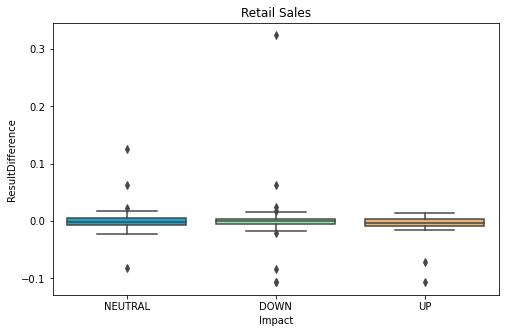

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Impact',y='ResultDifference',data=df_ec4, palette='rainbow')
plt.title("Retail Sales")

Text(0.5, 1.0, 'GDP')

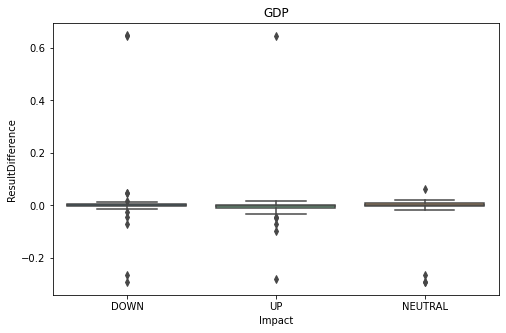

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Impact',y='ResultDifference',data=df_ec5, palette='rainbow')
plt.title("GDP")

Conclusion

Cannot find the difference of the previous/current Economic Indicators that has made impact to the market direction.

# 2) Using Technical Indicators

For this method, we first use EURUSD Closing Price as Data.
Then from the Closing Price, we create 

X (Features) = EURUSD Closing Price to convert to RSI, ClosingPrice Difference for 1Day, 2Day, 3Day and 4Day.
y (Target) = EURUSD Closing Price to convert to Trend Direction.

In [13]:
# IMPORT
file = './EURUSD.csv'
df = pd.read_csv(file)
df.set_index(['Date'])

,Open,High,Low,Close
Date,,,,
23/3/2012,1.31994,1.32928,1.31898,1.32647
24/3/2012,1.32647,1.32647,1.32647,1.32647
25/3/2012,1.32677,1.32687,1.32595,1.32680
26/3/2012,1.32700,1.33670,1.31917,1.33580
27/3/2012,1.33583,1.33847,1.33120,1.33128
...,...,...,...,...
22/2/2022,1.13088,1.13662,1.12871,1.13254
23/2/2022,1.13217,1.13584,1.13005,1.13038
24/2/2022,1.13030,1.13080,1.11056,1.11928


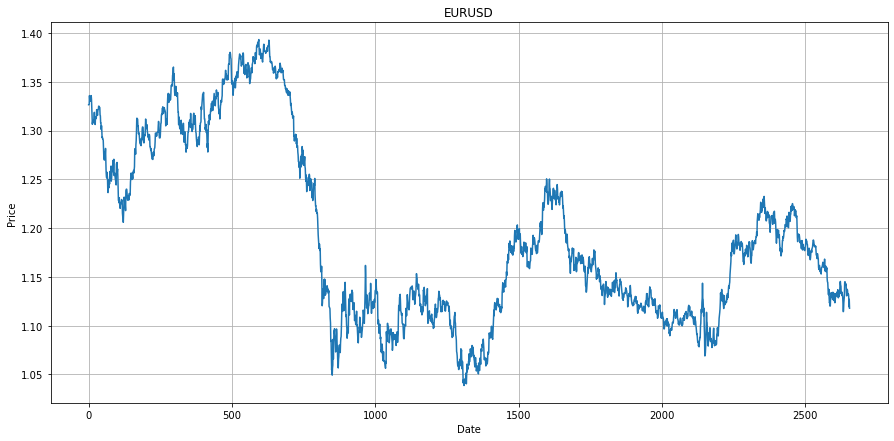

In [14]:
df.Close.plot(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EURUSD')
plt.grid()
plt.show()

In [15]:
df

,Date,Open,High,Low,Close
0,23/3/2012,1.31994,1.32928,1.31898,1.32647
1,24/3/2012,1.32647,1.32647,1.32647,1.32647
2,25/3/2012,1.32677,1.32687,1.32595,1.32680
3,26/3/2012,1.32700,1.33670,1.31917,1.33580
4,27/3/2012,1.33583,1.33847,1.33120,1.33128
...,...,...,...,...,...
2651,22/2/2022,1.13088,1.13662,1.12871,1.13254
2652,23/2/2022,1.13217,1.13584,1.13005,1.13038
2653,24/2/2022,1.13030,1.13080,1.11056,1.11928
2654,25/2/2022,1.11903,1.12735,1.11651,1.12700


In [20]:
# Create Predictors

import talib as ta
df['RSI'] = ta.RSI(df['Close'].values, timeperiod=14)
df['DIFF1'] = df['Close'].diff().values  # Close Price Difference between today and yesterday
df['DIFF2'] = df['Close'].diff(2).values # Close Price Difference between today and 2 days before
df['DIFF3'] = df['Close'].diff(3).values # Close Price Difference between today and 3 days before
df['DIFF4'] = df['Close'].diff(4).values # Close Price Difference between today and 4 days before

df.tail()

,Date,Open,High,Low,Close,RSI,DIFF1,DIFF2,DIFF3,DIFF4,Trend
2651,22/2/2022,1.13088,1.13662,1.12871,1.13254,48.021075,0.00164,0.00054,-0.00359,-0.00472,0
2652,23/2/2022,1.13217,1.13584,1.13005,1.13038,45.748745,-0.00216,-0.00052,-0.00162,-0.00575,0
2653,24/2/2022,1.13030,1.13080,1.11056,1.11928,36.254590,-0.01110,-0.01326,-0.01162,-0.01272,1
2654,25/2/2022,1.11903,1.12735,1.11651,1.12700,44.830072,0.00772,-0.00338,-0.00554,-0.00390,0
2655,28/2/2022,1.11496,1.11876,1.11418,1.11785,38.260349,-0.00915,-0.00143,-0.01253,-0.01469,0


In [21]:
# Creates Target

df['Trend'] = np.where(df.Close.shift(-1) > df.Close, 1, 0)
df.head(15)

,Date,Open,High,Low,Close,RSI,DIFF1,DIFF2,DIFF3,DIFF4,Trend
14,06/4/2012,1.30647,1.31118,1.30465,1.30914,NaN,NaN,NaN,NaN,NaN,0
15,07/4/2012,1.30887,1.30887,1.30887,1.30887,NaN,-0.00027,NaN,NaN,NaN,1
16,08/4/2012,1.30914,1.30988,1.30890,1.30979,NaN,0.00092,0.00065,NaN,NaN,1
17,09/4/2012,1.30975,1.31332,1.30330,1.31049,NaN,0.00070,0.00162,0.00135,NaN,0
18,10/4/2012,1.31046,1.31440,1.30538,1.30809,NaN,-0.00240,-0.00170,-0.00078,-0.00105,1
19,11/4/2012,1.30811,1.31562,1.30660,1.31087,NaN,0.00278,0.00038,0.00108,0.00200,1
20,12/4/2012,1.31089,1.32121,1.31018,1.31868,NaN,0.00781,0.01059,0.00819,0.00889,0
21,13/4/2012,1.31865,1.32004,1.30676,1.30724,NaN,-0.01144,-0.00363,-0.00085,-0.00325,0
22,14/4/2012,1.30724,1.30754,1.30724,1.30724,NaN,0.00000,-0.01144,-0.00363,-0.00085,0
23,15/4/2012,1.30774,1.30836,1.30583,1.30623,NaN,-0.00101,-0.00101,-0.01245,-0.00464,1


In [18]:
df.dropna(inplace=True)
predictors_list = ['RSI','DIFF1','DIFF2','DIFF3','DIFF4']
X = df[predictors_list]
y = df.Trend

y.tail()

2651    0
2652    0
2653    1
2654    0
2655    0
Name: Trend, dtype: int32

# Train-Test-Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1849, 5) (1849,)
(793, 5) (793,)


# 1) Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.5548549810844893

In [46]:
y_pred = gnb.predict(X_test)

In [47]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.5548549810844893
F1 score: 0.6073414905450502
Recall: 0.7036082474226805
Precision: 0.5342465753424658

 clasification report:
               precision    recall  f1-score   support

           0       0.59      0.41      0.49       405
           1       0.53      0.70      0.61       388

    accuracy                           0.55       793
   macro avg       0.56      0.56      0.55       793
weighted avg       0.56      0.55      0.55       793


 confussion matrix:
 [[167 238]
 [115 273]]


# 2) Decision Trees

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [49]:
clf = clf.fit(X_train, y_train)

[Text(494.5909090909091, 332.955, 'X[4] <= 0.031\ngini = 0.5\nsamples = 1849\nvalue = [944, 905]'),
 Text(304.3636363636364, 237.825, 'X[1] <= -0.009\ngini = 0.5\nsamples = 1838\nvalue = [934, 904]'),
 Text(152.1818181818182, 142.695, 'X[2] <= -0.006\ngini = 0.478\nsamples = 101\nvalue = [61, 40]'),
 Text(76.0909090909091, 47.565, 'gini = 0.45\nsamples = 79\nvalue = [52, 27]'),
 Text(228.27272727272728, 47.565, 'gini = 0.483\nsamples = 22\nvalue = [9, 13]'),
 Text(456.54545454545456, 142.695, 'X[1] <= -0.006\ngini = 0.5\nsamples = 1737\nvalue = [873, 864]'),
 Text(380.4545454545455, 47.565, 'gini = 0.48\nsamples = 110\nvalue = [44, 66]'),
 Text(532.6363636363636, 47.565, 'gini = 0.5\nsamples = 1627\nvalue = [829, 798]'),
 Text(684.8181818181819, 237.825, 'X[0] <= 62.745\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(608.7272727272727, 142.695, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(760.909090909091, 142.695, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

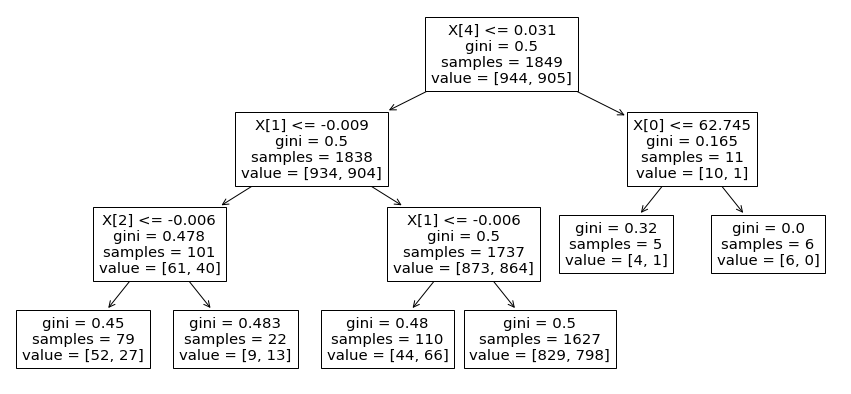

In [50]:
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(clf)

In [51]:
y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.5145018915510718
F1 score: 0.12300683371298406
Recall: 0.06958762886597938
Precision: 0.5294117647058824

 clasification report:
               precision    recall  f1-score   support

           0       0.51      0.94      0.66       405
           1       0.53      0.07      0.12       388

    accuracy                           0.51       793
   macro avg       0.52      0.51      0.39       793
weighted avg       0.52      0.51      0.40       793


 confussion matrix:
 [[381  24]
 [361  27]]


# 3) Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

0.5271122320302648

In [55]:
y_pred = clf_rf.predict(X_test)

In [56]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.5271122320302648
F1 score: 0.33628318584070793
Recall: 0.24484536082474226
Precision: 0.536723163841808

 clasification report:
               precision    recall  f1-score   support

           0       0.52      0.80      0.63       405
           1       0.54      0.24      0.34       388

    accuracy                           0.53       793
   macro avg       0.53      0.52      0.48       793
weighted avg       0.53      0.53      0.49       793


 confussion matrix:
 [[323  82]
 [293  95]]
